# Scaler - Clustering  (Case Study)

**Problem Definition:**
Scaler, an online tech-versity, seeks to better understand its diverse learner base by clustering them based on job profiles, companies, and experience. With learners coming from varied professional backgrounds, Scaler faces challenges in delivering a personalized learning experience that meets individual needs. By grouping learners with similar characteristics, Scaler can offer tailored content and mentorship, leading to improved satisfaction and retention. Data science and unsupervised learning, particularly clustering
techniques, can help uncover patterns in learner data, supporting Scaler's goal of enhancing curriculum alignment and learner engagement.

**Objective:**
The objective is to implement a clustering model to group learners based on key attributes like job roles, companies, and experience levels. This will enable Scaler to:

*  Personalize learning experiences for each cluster.
*  Improve satisfaction and retention by tailoring content and mentorship.
*  Uncover hidden patterns to inform curriculum development and learner engagement strategies.

Through this task, learners will apply unsupervised learning techniques to solve a real-world business problem, refining their skills in data preprocessing, feature engineering, and exploratory data analysis while contributing valuable insights to Scaler's educational strategy.

**Column Profiling:**

* **Unnamed 0 -** Index of the dataset
* **Email_hash -** Anonymised Personal Identifiable Information (PII)
* **Company_hash -** This represents an anonymized identifier for the company, which is the current employer of the learner.
* **orgyear -** Employment start date
* **CTC -** Current CTC
* **Job_position -** Job profile in the company
* **CTC_updated_year -** Year in which CTC got updated (Yearly increments, Promotions)

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics

import warnings
warnings.simplefilter('ignore')

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

--2024-09-30 11:30:01--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.71, 18.64.229.135, 18.64.229.91, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24735965 (24M) [text/plain]
Saving to: ‘scaler_clustering.csv’

scaler_clustering.c 100%[===================>]  23.59M  96.1MB/s    in 0.2s    

2024-09-30 11:30:01 (96.1 MB/s) - ‘scaler_clustering.csv’ saved [24735965/24735965]



In [3]:
# read the csv file

df = pd.read_csv('scaler_clustering.csv')

# **Exploratory Data Analysis**

In [4]:
# shape of the data

df.shape

(205843, 7)

**Insights:** Dataset has 205843 rows and 7 columns.


In [5]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [6]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [7]:
# Basic Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [8]:
# Removing the unwanted column 'Unnamed: 0'

df.drop("Unnamed: 0", axis = 1, inplace = True)

In [9]:
# Convert 'orgyear' and 'ctc_updated_year' to integers
# Using 'errors="coerce"' to handle any non-numeric values, which will be set to NaN

df['orgyear'] = pd.to_numeric(df['orgyear'], errors='coerce').astype('Int64')
df['ctc_updated_year'] = pd.to_numeric(df['ctc_updated_year'], errors='coerce').astype('Int64')

# Display the first few rows to verify the changes
print(df[['orgyear', 'ctc_updated_year']].head(10))

   orgyear  ctc_updated_year
0     2016              2020
1     2018              2019
2     2015              2020
3     2017              2019
4     2017              2019
5     2018              2020
6     2018              2019
7     2019              2019
8     2020              2019
9     2019              2019


In [10]:
# Duplicate value check

df.duplicated().sum()

34

**Insights:** The dataset contains 34 exact duplicate rows, indicating potential redundant or duplicate data entries.

In [11]:
# Dropping duplicate records

df.drop_duplicates(inplace=True)

In [12]:
df.shape

(205809, 6)

In [13]:
# Missing / null value check

df.isna().sum()

,0
company_hash,44
email_hash,0
orgyear,86
ctc,0
job_position,52548
ctc_updated_year,0


**Insights:** The dataset contains null values in 3 columns `company_hash`, `orgyear` and `job_position`.

In [14]:
# Summary statistics

df.describe()

,orgyear,ctc,ctc_updated_year
count,205723.0,2.058090e+05,205809.0
mean,2014.882264,2.271862e+06,2019.628272
std,63.576352,1.180187e+07,1.325187
min,0.0,2.000000e+00,2015.0
25%,2013.0,5.300000e+05,2019.0
50%,2016.0,9.500000e+05,2020.0
75%,2018.0,1.700000e+06,2021.0
max,20165.0,1.000150e+09,2021.0


In [15]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205765,205809,153261
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43546


**Insights:**

* **Data Quality Issues:** Invalid orgyear values (min: 0, max: 20165) suggest data entry errors.
* **CTC Outliers:** Extreme variation in ctc, with a max of 1 billion, indicating potential outliers.
* **Median CTC:** Most employees have a salary around 950000, despite large salary extremes.
* **Recent Salary Updates:** 50% of salaries were updated by 2020, with most updates between 2019 and 2021.
* **Company Concentration:** 37299 unique companies, with one company employing 8337 people.
* **Job Role Dominance:** "Backend Engineer" is the most frequent role, held by 43546 employees.

# Feature Engineering

## Handling missing/null values

To handle the missing values in the `orgyear` column by filling them with the `ctc_updated_year` minimum value - 1 corresponding to the `email_hash` and `company_hash`.

In [16]:
# Check the missing values specifically in 'orgyear'

df['orgyear'].isnull().sum()

86

In [17]:
# Grouping by 'email_hash' and 'company_hash' to find the minimum 'ctc_updated_year'

min_ctc_year = df.groupby(['email_hash', 'company_hash'])['ctc_updated_year'].min().reset_index()
min_ctc_year.rename(columns={'ctc_updated_year': 'min_ctc_updated_year'}, inplace=True)
min_ctc_year.head()

,email_hash,company_hash,min_ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2019
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2020
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2019
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2021
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2018


In [18]:
# Merge the minimum 'ctc_updated_year' values back to the main dataframe

df = df.merge(min_ctc_year, on=['email_hash', 'company_hash'], how='left')
df[df['orgyear'].isna()].head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,min_ctc_updated_year
2333,xgmgn ntwyzgrgsxto ucn rna,c737ceb66c7f0ce37c2fce087003aa129632a3a2fa4f6c...,<NA>,170000,Other,2020,2020
2562,tj,25edac17c77f6f0edeafb86f7a7844d96dc899e193c87e...,<NA>,860000,Data Analyst,2020,2020
3122,ft tdwtr,c402eba160abf4e5b5f72af775fc98dbd346f1a081112e...,<NA>,600000,Support Engineer,2020,2020
3365,fyxntyvn lq,38bd913564fa983cd4fb7799e4027d8ed2b0fd6263e15a...,<NA>,800000,NaN,2021,2021
4010,nxamxn ogrhnxgzo,f9c1d0e623046d445a705bc39007f05619bcd37c75d3e8...,<NA>,900000,NaN,2020,2020


In [19]:
# Fill missing 'orgyear' values with 'min_ctc_updated_year-1'

df['orgyear'] = df.apply(
    lambda row: row['min_ctc_updated_year']-1 if pd.isnull(row['orgyear']) else row['orgyear'],
    axis=1)

# Drop the temporary 'min_ctc_updated_year' column after filling
df.drop(columns=['min_ctc_updated_year'], inplace=True)

In [20]:
# Check if there are any missing values left in 'orgyear'

df['orgyear'].isna().sum()

0

In [21]:
# Check the missing values specifically in 'company_hash'

df['company_hash'].isna().sum()

44

In [22]:
# Remove records where company_hash is missing

df.dropna(subset=['company_hash'],inplace=True)

In [23]:
# Check if there are any missing values left in 'company_hash'

df['company_hash'].isna().sum()

0

To fill missing values in `job_position`, group the data by `ctc_updated_year` and ctc, then impute missing `job_position` values with the most common (mode) job position within each group.

In [24]:
# Check the missing values specifically in 'job_position'

df['job_position'].isnull().sum()

52517

In [25]:
# Grouping by 'ctc_updated_year' and 'ctc' to find the mode of 'job_position'

# Function to safely get the mode of a series
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Applying the function to get the mode of 'job_position' for each group
job_mode_by_group = df.groupby(['ctc_updated_year', 'ctc'])['job_position'].apply(get_mode).reset_index()
job_mode_by_group.rename(columns={'job_position': 'mode_job_position'}, inplace=True)

# Merging the mode job position back into the main dataframe
df = df.merge(job_mode_by_group, on=['ctc_updated_year', 'ctc'], how='left')

In [26]:
# Fill missing 'job_position' values with the mode corresponding to 'ctc_updated_year' and 'ctc'

df['job_position'] = df.apply(
    lambda row: row['mode_job_position'] if pd.isnull(row['job_position']) else row['job_position'],
    axis=1)

# Dropping the temporary 'mode_job_position' column
df.drop(columns=['mode_job_position'], inplace=True)

In [27]:
# Check if there are any missing values left in 'job_position'

df['job_position'].isnull().sum()

623

In [28]:
# Grouping by 'ctc' to find the mode of 'job_position'

# Applying the function to get the mode of 'job_position' for each group
job_mode_by_ctc = df.groupby(['ctc'])['job_position'].apply(get_mode).reset_index()
job_mode_by_ctc.rename(columns={'job_position': 'mode_job_position'}, inplace=True)

# Merging the mode job position back into the main dataframe
df = df.merge(job_mode_by_ctc, on=['ctc'], how='left')

In [29]:
# Fill missing 'job_position' values with the mode corresponding to 'ctc'

df['job_position'] = df.apply(
    lambda row: row['mode_job_position'] if pd.isnull(row['job_position']) else row['job_position'],
    axis=1)

# Dropping the temporary 'mode_job_position' column
df.drop(columns=['mode_job_position'], inplace=True)

In [30]:
# Check if there are any missing values left in 'job_position'

df['job_position'].isnull().sum()

233

In [31]:
# Remove remaining records where 'job_position' is null

df.dropna(subset=['job_position'],inplace=True)

In [32]:
# Check if there are any missing values left in 'job_position'

df['job_position'].isnull().sum()

0

In [33]:
# Check if there are any missing values left in the dataset

df.isnull().sum()

,0
company_hash,0
email_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


## Data Preprocessing & Analysis

In [34]:
import re

def preprocess_string(mystring):
 new_string= re.sub('[^A-Za-z0-9 ]+', '', mystring).lower().strip()
 return new_string

mystring='\tAirtel X Labs'
preprocess_string(mystring)

'airtel x labs'

Now, apply `preprocess_string` on categorical columns.

In [35]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year'],
      dtype='object')

In [36]:
df["company_hash"].nunique()

37272

In [37]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["company_hash"].nunique()

37272

In [38]:
df["email_hash"].nunique()

153222

In [39]:
df["email_hash"] = df["email_hash"].apply(lambda x: preprocess_string(str(x)))
df["email_hash"].nunique()

153222

In [40]:
df["job_position"].nunique()

1016

In [41]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

899

**Insights:**

*  37272 unique `company_hash` are there in the dataset after preprocessing strings.
*  153222 unique `email_hash` are there in the dataset after preprocessing strings.
*  899 unique `job_position` are there in the dataset after preprocessing strings.

### Email hash

In [42]:
# Check frequency of each unique email hash
email_counts = df['email_hash'].value_counts()

# View the first few rows to get an idea of the frequency distribution
print(email_counts.head(10),end='\n\n')

# Check how many email hashes are duplicated
duplicate_emails = email_counts[email_counts > 1]

# Record how many emails are duplicated and how many unique emails exist
num_unique_emails = len(email_counts)
num_duplicate_emails = len(duplicate_emails)

print(f"Total unique email hashes: {num_unique_emails}")
print(f"Number of duplicated email hashes: {num_duplicate_emails}")
print(f"Max occurrences of a single email hash: {email_counts.max()}")

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
faf40195f8c58d5c7edc758cc725a762d51920da996410b80ac4a4d85c803da0     8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551     8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
Name: count, dtype: int64

Total unique email hashes: 153222
Number of duplicated email hashes: 41152
Max occurrences of a single email hash: 10


**Insights:**

* **Total Unique Emails:** The dataset contains 153222 unique email hashes.
* **High Duplication:** There are 41152 duplicate email hashes, indicating repeated usage of the same email.
* **Max Email Frequency:** The most frequent email hash appears 10 times.
* **Common Emails:** Several email hashes occur 8–10 times, suggesting these might represent either multiple entries for the same individual or organizations using shared emails.

In [43]:
df[df['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24099,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,other,2020
45971,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,support engineer,2020
72298,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,other,2020
102889,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,fullstack engineer,2020
117727,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,720000,data analyst,2020
121444,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,other,2019
124435,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,support engineer,2019
144428,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,fullstack engineer,2019
152747,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,devops engineer,2019
159779,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018,660000,backend engineer,2019


In [44]:
df[df['email_hash']=='3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
10209,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1130000,engineering intern,2021
10729,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1130000,other,2021
16644,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1130000,backend engineer,2021
18158,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1130000,data scientist,2021
20785,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1130000,data analyst,2021
137946,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1085000,data scientist,2020
164870,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1085000,data analyst,2020
168294,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1085000,backend engineer,2020
172114,wgcxvb ntwyzgrgsxto,3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94...,2018,1085000,engineering intern,2020


**Insights:** For a single anonymized Personal Identifiable Information (PII) ID, multiple rows exist with the same joining dates and company but different job positions, which is not feasible. Therefore, we will retain only the first row for each duplicated PII ID.

In [45]:
df = df.drop_duplicates(subset=['email_hash'], keep='first')

# Check the number of rows after dropping duplicates
print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 153222


### Company hash

In [46]:
# Check frequency of each unique company hash
company_counts = df['company_hash'].value_counts()

# View the first few rows to get an idea of the frequency distribution
print("Top 10 Companies:\n", company_counts.head(10), end='\n\n')
print("Bottom 10 Companies:\n", company_counts.tail(10), end='\n\n')

# Record how many companies are duplicated and how many unique companies exist
num_unique_companies = len(company_counts)

print(f"Total unique company hashes: {num_unique_companies}")
print(f"Max occurrences of a single company hash: {company_counts.max()}")

Top 10 Companies:
 company_hash
nvnv wgzohrnvzwj otqcxwto    5243
xzegojo                      3475
vbvkgz                       2532
zgn vuurxwvmrt vwwghzn       2275
wgszxkvzn                    2198
vwwtznhqt                    1958
gqvwrt                       1741
fxuqg rxbxnta                1726
bxwqgogen                    1553
wvustbxzx                    1359
Name: count, dtype: int64

Bottom 10 Companies:
 company_hash
xbvsxztv uvqn ge vwwtznhqt                1
uxgzttq ogrhnxgzo                         1
bvzxuvr agn ztn                           1
srgmvr urvwtbtznotqcxwto                  1
ftm urvztn                                1
bxzxgqvzst otwhqxnj otqcxwto ucn rna      1
vhqv atwxwto                              1
stgwytb ucn rna                           1
qtugqnatop xn otqcxwto uqxcvnt rxbxnta    1
bvptbjnqxu td vbvkgz                      1
Name: count, dtype: int64

Total unique company hashes: 36315
Max occurrences of a single company hash: 5243


In [47]:
# Masked company name to 'Others' having count less than 5

df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5,'company_hash'] = 'others'
(df['company_hash'] == 'others').sum()

41987

In [48]:
df[df['company_hash']=='others']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
2,others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,backend engineer,2020
5,others,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018,700000,fullstack engineer,2020
9,others,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019,360000,other,2019
11,others,72c2171a022115d475c8faac306912a4c95f6dd7fdd320...,2016,600000,ios engineer,2021
16,others,26ec792de0792706df9beb9a8d37f45d732982e7ea21e2...,2013,800000,other,2020
...,...,...,...,...,...,...
205707,others,3201950d49607287627626a0c3568cad1ab7b9ecc11e7d...,2012,2100000,backend engineer,2018
205709,others,82fb93cc69f801b77356fb6b3c139d823d9c05be8552f0...,2013,840000,backend engineer,2019
205733,others,5feda7334a13c3f92937c0b3c4048aaab617edaf59ee4e...,2013,85000,backend engineer,2016
205737,others,6b163240ed6d31edd56950011b578d1cf255c7515c3f16...,2015,2400000,backend engineer,2019


### CTC updated year

In [49]:
df['ctc_updated_year'].nunique()

7

In [50]:
df['ctc_updated_year'].unique()

<IntegerArray>
[2020, 2019, 2021, 2017, 2016, 2015, 2018]
Length: 7, dtype: Int64

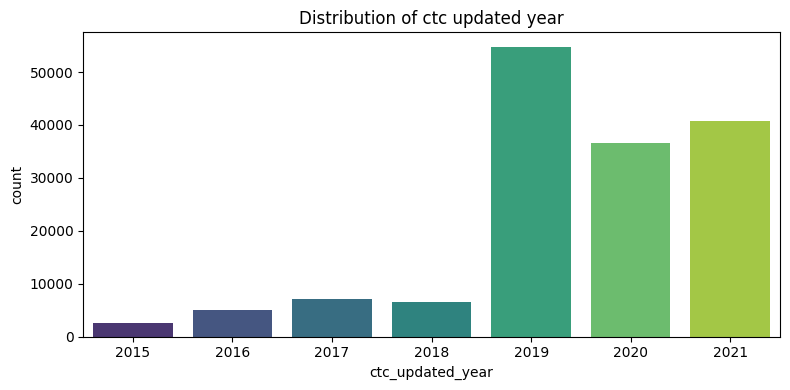

In [51]:
plt.figure(figsize=(8, 4))

# Create the count plot for 'ctc_updated_year'
sns.countplot(x=df['ctc_updated_year'], palette='viridis')

plt.title('Distribution of ctc updated year', fontsize=12)
plt.tight_layout()
plt.show()

### Orgyear

In [52]:
df['orgyear'].nunique()

77

In [53]:
df['orgyear'].unique()

array([ 2016,  2018,  2015,  2017,  2019,  2020,  2012,  2013,  2003,
        2006,  2014,  2011,  2021,  2008,  2004,  2022,  2009,  2005,
        2010,  2007,  2000,  2002,  2023,  2001,  1981,  2031,  2024,
        1996,  1999,  2106,  1997,  1994,  1995,  1992,  1973,  1991,
        1998,  1990,  1993,  1988,  2025,  2029,     0,   208,  1985,
         209,   206,  1982,  2026,  1970,  2101,  1972,  2107,  1986,
        1989,    91,  1987,     3,  2027,     2,  1976,     4,     5,
        1971,  1977,  1984,    83,     1,  1979,  2204,    38,  1900,
         201,     6, 20165,   200,  2028])

In [54]:
# Filter the DataFrame for orgyear < 1970 or orgyear > 2024
invalid_years = df[(df['orgyear'] < 1970) | (df['orgyear'] > 2024)]

# Display the invalid orgyear values
invalid_years['orgyear'].unique()

array([ 2031,  2106,  2025,  2029,     0,   208,   209,   206,  2026,
        2101,  2107,    91,     3,  2027,     2,     4,     5,    83,
           1,  2204,    38,  1900,   201,     6, 20165,   200,  2028])

Cleaning the `orgyear` data manually.

In [55]:
year_dict = {2031: 2013, 2106: 2016, 2025: 2015, 2029: 2019, 208: 2018, 209: 2019,
             206: 2016, 2026: 2016, 2101: 2011, 2107: 2017, 2027: 2017, 2204: 2014,
             1900: 1970,  201:2011, 20165: 2016, 200: 2010, 2028: 2018}

In [56]:
# Replace years in the 'orgyear' column on basis of year_dict

df['orgyear'] = df['orgyear'].replace(year_dict)

In [57]:
# Filter the DataFrame for orgyear < 1970 or orgyear > 2024
invalid_years = df[(df['orgyear'] < 1970) | (df['orgyear'] > 2024)]

# Display the invalid orgyear values
invalid_years['orgyear'].unique()

array([ 0, 91,  3,  2,  4,  5, 83,  1, 38,  6])

In [58]:
# Drop rows where orgyear is invalid

df.drop(invalid_years.index,inplace=True)

In [59]:
# Filter the DataFrame for orgyear < 1970 or orgyear > 2024
invalid_years = df[(df['orgyear'] < 1970) | (df['orgyear'] > 2024)]

# Display the invalid orgyear values
invalid_years['orgyear'].unique()

array([], dtype=int64)

In [60]:
df['orgyear'].nunique()

50

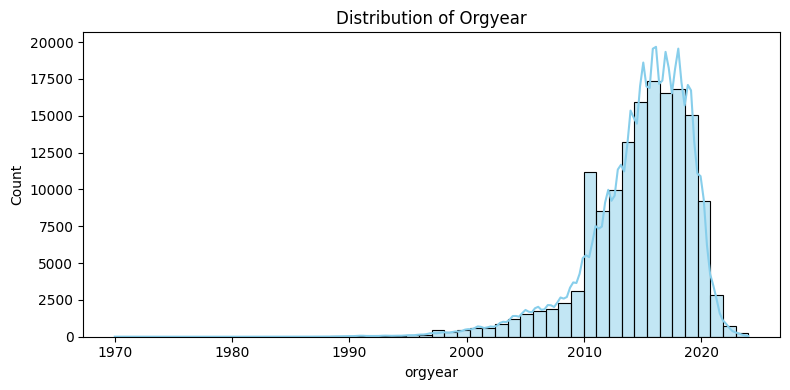

In [61]:
plt.figure(figsize=(8, 4))

sns.histplot(df['orgyear'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Orgyear', fontsize=12)
plt.tight_layout()
plt.show()

### Outlier treatment for Orgyear

In [62]:
def cap_outliers(df, col, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[col].quantile(lower_percentile)
    upper_cap = df[col].quantile(upper_percentile)
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])
    return df

df = cap_outliers(df, 'orgyear')

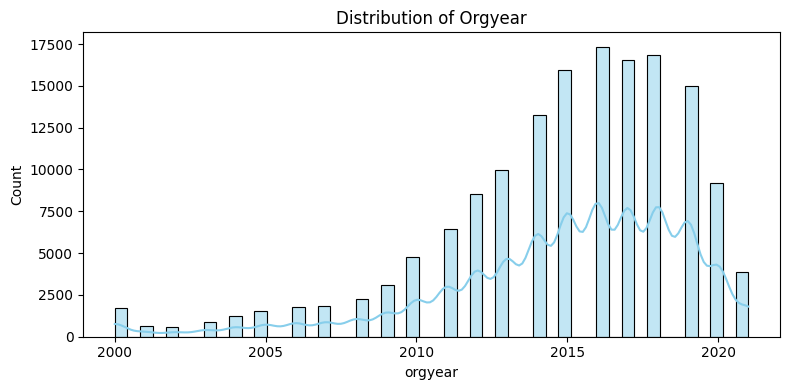

In [63]:
plt.figure(figsize=(8, 4))

sns.histplot(df['orgyear'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Orgyear', fontsize=12)
plt.tight_layout()
plt.show()

### Job position

In [64]:
# Check frequency of each unique job position
job_position_counts = df['job_position'].value_counts()

# View the first few rows to get an idea of the frequency distribution for job positions
print("Top 10 Job Positions:\n", job_position_counts.head(10), end='\n\n')

# Record how many unique job positions exist
num_unique_job_positions = len(job_position_counts)

print(f"Total unique job positions: {num_unique_job_positions}")
print(f"Max occurrences of a single job position: {job_position_counts.max()}")

Top 10 Job Positions:
 job_position
backend engineer          56088
fullstack engineer        20427
other                     20294
frontend engineer          8479
engineering leadership     6837
qa engineer                6010
sdet                       4745
android engineer           4740
data scientist             4674
devops engineer            4146
Name: count, dtype: int64

Total unique job positions: 669
Max occurrences of a single job position: 56088


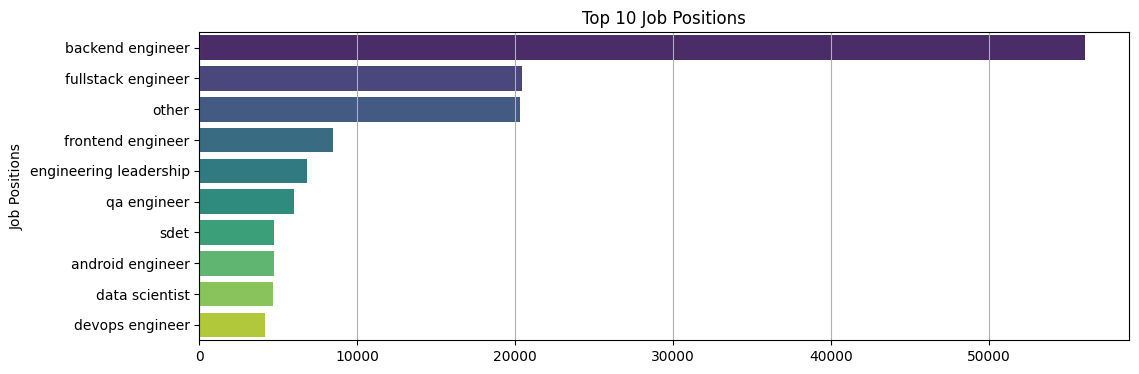

In [65]:
plt.figure(figsize=(12, 4))
sns.barplot(x=job_position_counts.head(10).values, y=job_position_counts.head(10).index, palette="viridis")
plt.title('Top 10 Job Positions')
plt.ylabel('Job Positions')
plt.grid(axis='x')
plt.show()

### CTC

In [66]:
print("Descriptive Statistics for CTC:\n", df['ctc'].describe())

Descriptive Statistics for CTC:
 count    1.531870e+05
mean     2.486283e+06
std      1.274882e+07
min      2.000000e+00
25%      5.500000e+05
50%      9.619990e+05
75%      1.700000e+06
max      2.000000e+08
Name: ctc, dtype: float64


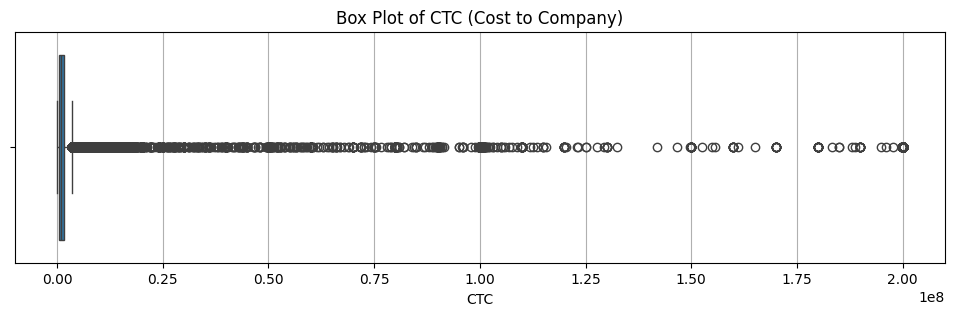

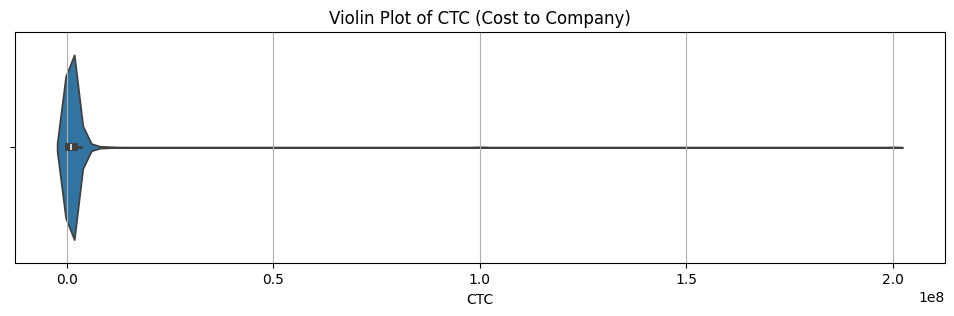

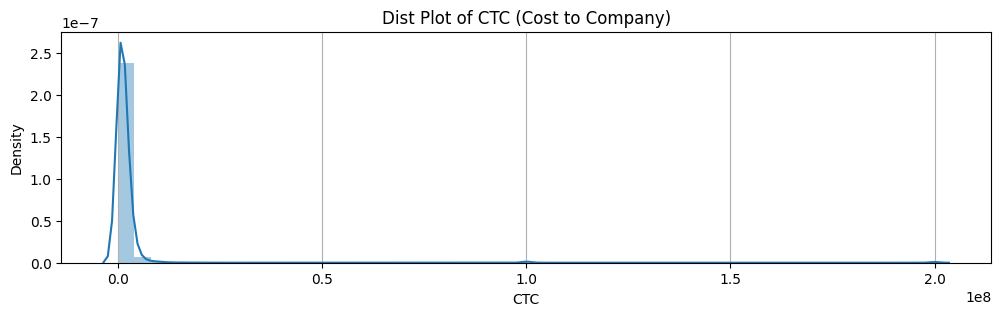

In [67]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['ctc'])
plt.title('Box Plot of CTC (Cost to Company)')
plt.xlabel('CTC')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 3))
sns.violinplot(x=df['ctc'])
plt.title('Violin Plot of CTC (Cost to Company)')
plt.xlabel('CTC')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 3))
sns.distplot(x=df['ctc'])
plt.title('Dist Plot of CTC (Cost to Company)')
plt.xlabel('CTC')
plt.grid(axis='x')
plt.show()

### Outlier treatment for CTC

In [68]:
def cap_outliers(df, col, lower_percentile=0.01, upper_percentile=0.99):
    lower_cap = df[col].quantile(lower_percentile)
    upper_cap = df[col].quantile(upper_percentile)
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])
    return df

df = cap_outliers(df, 'ctc')

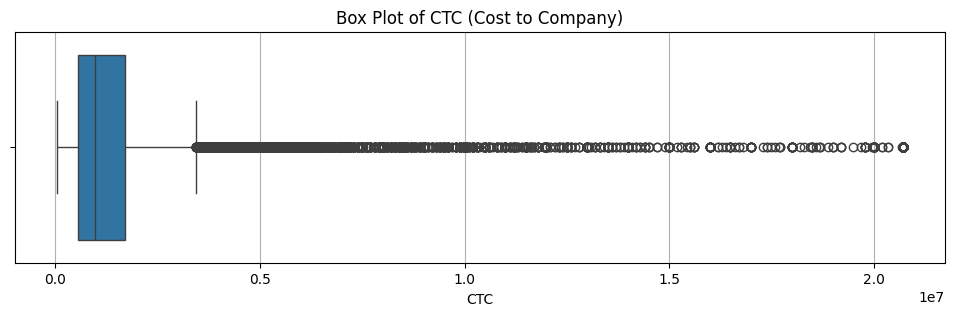

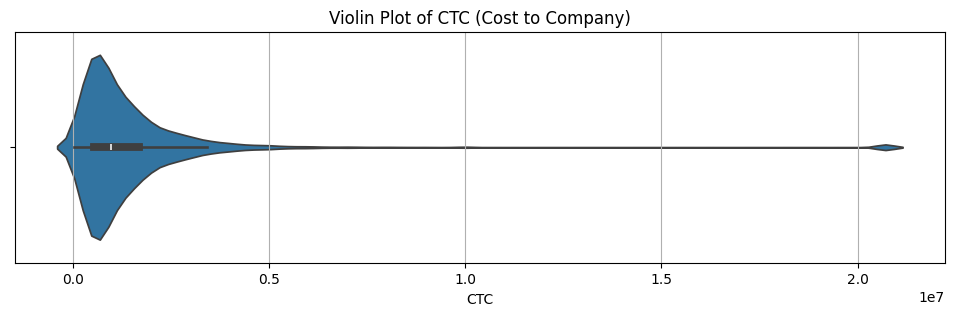

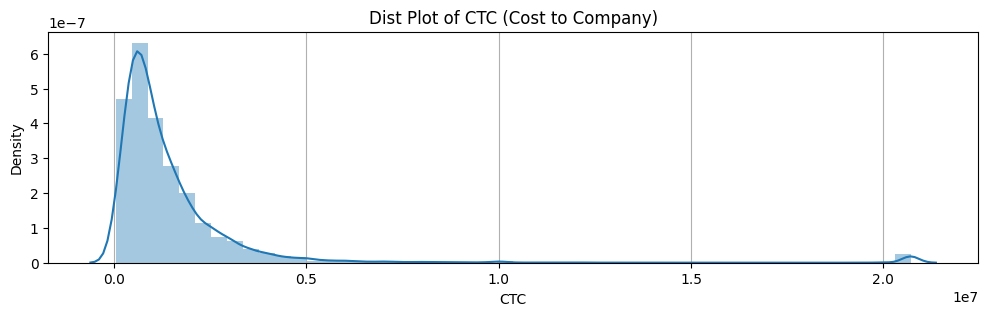

In [69]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=df['ctc'])
plt.title('Box Plot of CTC (Cost to Company)')
plt.xlabel('CTC')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 3))
sns.violinplot(x=df['ctc'])
plt.title('Violin Plot of CTC (Cost to Company)')
plt.xlabel('CTC')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(12, 3))
sns.distplot(x=df['ctc'])
plt.title('Dist Plot of CTC (Cost to Company)')
plt.xlabel('CTC')
plt.grid(axis='x')
plt.show()

### Creating Years of Experience feature

In [70]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year
current_year

2024

In [71]:
# Create the 'years of experience' column by subtracting 'orgyear' from the current year

df['years_of_experience'] = current_year - df['orgyear']

In [72]:
df['years_of_experience'].nunique()

22

In [73]:
df['years_of_experience'].unique()

array([ 8.,  6.,  9.,  7.,  5.,  4., 12., 11., 21., 18., 10., 13.,  3.,
       16., 20., 15., 19., 14., 17., 24., 22., 23.])

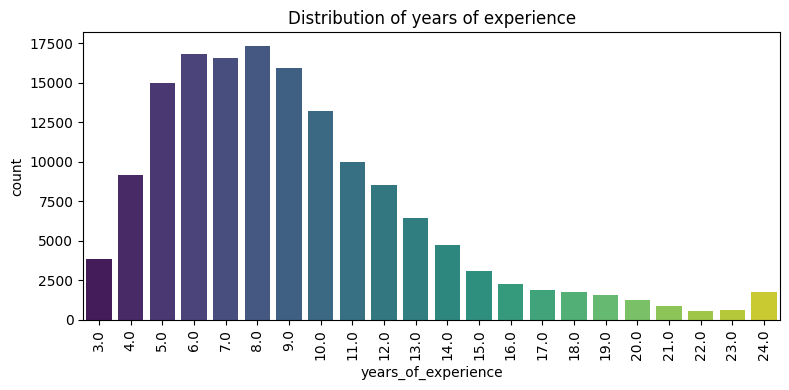

In [74]:
plt.figure(figsize=(8, 4))

# Create the count plot for 'years_of_experience'
sns.countplot(x=df['years_of_experience'], palette='viridis')

plt.title('Distribution of years of experience', fontsize=12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

### Treating records having ctc_updated_year higher than their organization joining year


In [75]:
# records having ctc_updated_year higher than their organization joining year
(df['ctc_updated_year'] < df['orgyear']).sum()

6520

In [76]:
df.ctc_updated_year = df[['ctc_updated_year','orgyear']].max(axis = 1)

In [77]:
(df['ctc_updated_year'] < df['orgyear']).sum()

0

### Pairplot and Correlation Heatmap

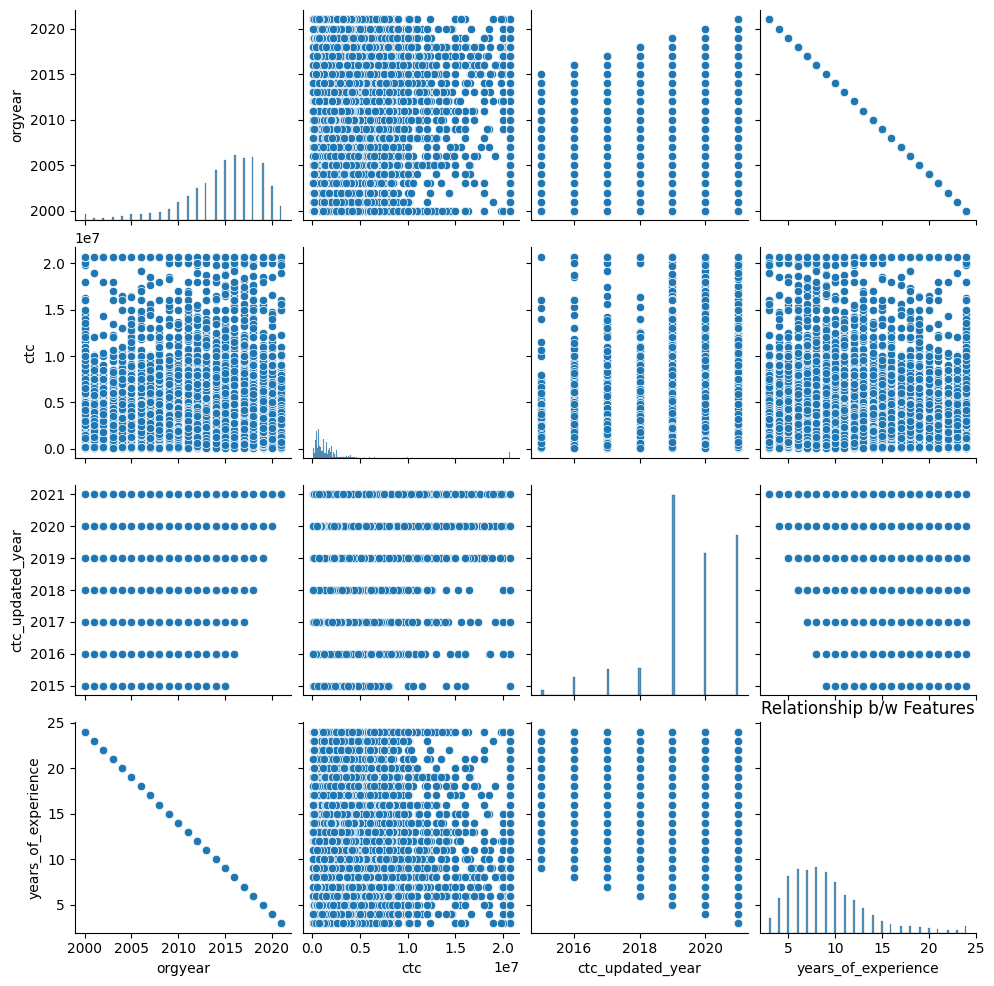

In [78]:
# Checking the overall linearity and correlation across all features using pairplot

sns.pairplot(df)
plt.title('Relationship b/w Features')
plt.show()

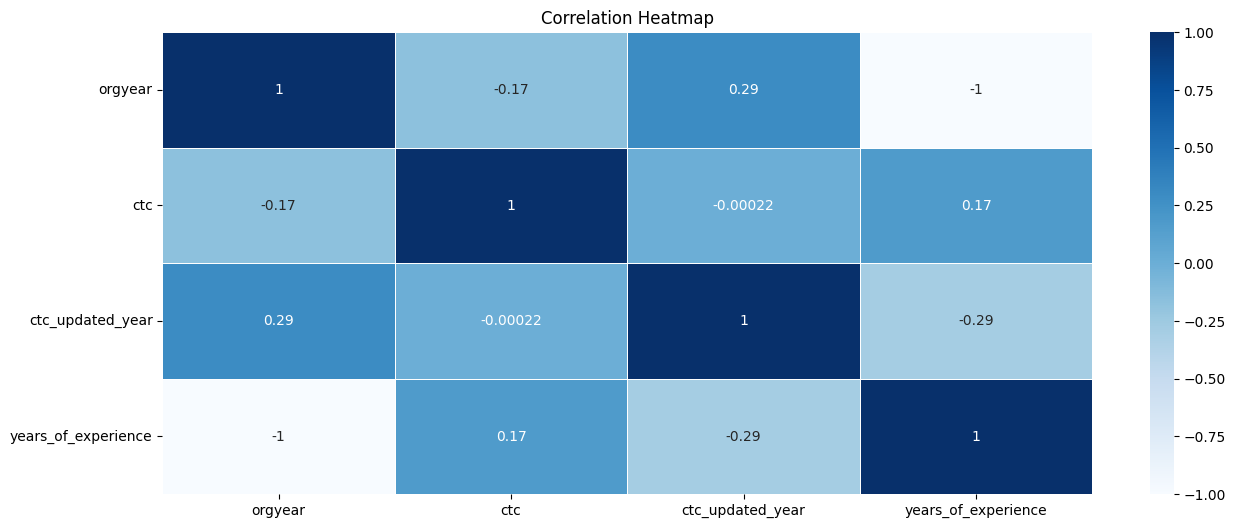

In [79]:
# Create a heatmap for the correlation matrix

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues',edgecolors='black',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Manual Clustering**

## Based on Company , Job position and Years of experience.


In [80]:
# Grouping by company, job position, and years of experience to calculate 5-point summary
ctc_summary = df.groupby(['company_hash', 'job_position', 'years_of_experience']).agg(
    mean_ctc=('ctc', 'mean'),
    median_ctc=('ctc', 'median'),       # 50th percentile
    quantile_75_ctc=('ctc', lambda x: x.quantile(0.75)),  # 75th percentile
    max_ctc=('ctc', 'max'),
    min_ctc=('ctc', 'min'),
    count_ctc=('ctc', 'count')
).reset_index()

# Merging the ctc_summary back into the original DataFrame
df = df.merge(ctc_summary, on=['company_hash', 'job_position', 'years_of_experience'], how='left')

# Define a function to categorize CTC compared to the mean CTC
def calculate_designation_flag(row):
    if row['ctc'] < row['median_ctc']:
        return 3
    elif row['ctc'] <= row['quantile_75_ctc']:
        return 2
    else:
        return 1

# Apply the function to each row
df['designation_flag'] = df.apply(calculate_designation_flag, axis=1)

In [81]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,quantile_75_ctc,max_ctc,min_ctc,count_ctc,designation_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,other,2020.0,8.0,1.100000e+06,1100000.0,1100000.0,1.100000e+06,1100000.0,1,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,fullstack engineer,2019.0,6.0,6.742856e+05,620000.0,800000.0,9.500000e+05,449999.0,7,3
2,others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,backend engineer,2020.0,9.0,1.250163e+06,959999.5,1500000.0,2.070840e+07,40000.0,1258,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,backend engineer,2019.0,7.0,1.275000e+06,1200000.0,1712500.0,2.000000e+06,700000.0,8,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,fullstack engineer,2019.0,7.0,1.400000e+06,1400000.0,1400000.0,1.400000e+06,1400000.0,1,2


In [82]:
df['designation_flag'].value_counts(normalize=True)*100

,proportion
designation_flag,
2,44.300757
3,34.745115
1,20.954128


## Based on Company and Job position.

In [83]:
# Grouping by company and job position to calculate the mean CTC
class_summary = df.groupby(['company_hash', 'job_position']).agg(
    class_mean_ctc=('ctc', 'mean'),
    class_median_ctc=('ctc', 'median'),       # 50th percentile
    class_quantile_75_ctc=('ctc', lambda x: x.quantile(0.75)),  # 75th percentile
).reset_index()

# Merging the class summary with the DataFrame
df = df.merge(class_summary, on=['company_hash', 'job_position'], how='left')

# Function to calculate the class flag
def calculate_class_flag(row):
    if row['ctc'] < row['class_median_ctc']:
        return 3
    elif row['ctc'] <= row['class_quantile_75_ctc']:
        return 2
    else:
        return 1

# Applying the function to create the class flag
df['class_flag'] = df.apply(calculate_class_flag, axis=1)

In [84]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,quantile_75_ctc,max_ctc,min_ctc,count_ctc,designation_flag,class_mean_ctc,class_median_ctc,class_quantile_75_ctc,class_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,other,2020.0,8.0,1.100000e+06,1100000.0,1100000.0,1.100000e+06,1100000.0,1,2,1.085000e+06,1085000.0,1092500.0,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,fullstack engineer,2019.0,6.0,6.742856e+05,620000.0,800000.0,9.500000e+05,449999.0,7,3,8.952000e+05,680000.0,1300000.0,3
2,others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,backend engineer,2020.0,9.0,1.250163e+06,959999.5,1500000.0,2.070840e+07,40000.0,1258,1,1.411140e+06,980000.0,1550000.0,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,backend engineer,2019.0,7.0,1.275000e+06,1200000.0,1712500.0,2.000000e+06,700000.0,8,3,1.688462e+06,1725000.0,1937500.0,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,fullstack engineer,2019.0,7.0,1.400000e+06,1400000.0,1400000.0,1.400000e+06,1400000.0,1,2,8.466667e+05,600000.0,1000000.0,1


In [85]:
df['class_flag'].value_counts(normalize=True)*100

,proportion
class_flag,
3,43.971094
2,31.785987
1,24.242919


## Based on Comapny.

In [86]:
# Grouping by company to calculate the mean CTC
tier_summary = df.groupby(['company_hash']).agg(
    tier_mean_ctc=('ctc', 'mean'),
    tier_median_ctc=('ctc', 'median'),       # 50th percentile
    tier_quantile_75_ctc=('ctc', lambda x: x.quantile(0.75)),  # 75th percentile
).reset_index()

# Merging the tier summary with the DataFrame
df = df.merge(tier_summary, on='company_hash', how='left')

# Function to calculate the tier flag
def calculate_tier_flag(row):
    if row['ctc'] < row['tier_median_ctc']:
        return 3
    elif row['ctc'] <= row['tier_quantile_75_ctc']:
        return 2
    else:
        return 1

# Applying the function to create the tier flag
df['tier_flag'] = df.apply(calculate_tier_flag, axis=1)

In [87]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience,mean_ctc,median_ctc,quantile_75_ctc,...,count_ctc,designation_flag,class_mean_ctc,class_median_ctc,class_quantile_75_ctc,class_flag,tier_mean_ctc,tier_median_ctc,tier_quantile_75_ctc,tier_flag
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000.0,other,2020.0,8.0,1.100000e+06,1100000.0,1100000.0,...,1,2,1.085000e+06,1085000.0,1092500.0,1,1.115667e+06,1070000.0,1500000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999.0,fullstack engineer,2019.0,6.0,6.742856e+05,620000.0,800000.0,...,7,3,8.952000e+05,680000.0,1300000.0,3,1.426713e+06,900000.0,1650000.0,3
2,others,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000.0,backend engineer,2020.0,9.0,1.250163e+06,959999.5,1500000.0,...,1258,1,1.411140e+06,980000.0,1550000.0,1,1.425516e+06,800000.0,1400000.0,1
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000.0,backend engineer,2019.0,7.0,1.275000e+06,1200000.0,1712500.0,...,8,3,1.688462e+06,1725000.0,1937500.0,3,1.683900e+06,1500000.0,1987500.0,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000.0,fullstack engineer,2019.0,7.0,1.400000e+06,1400000.0,1400000.0,...,1,2,8.466667e+05,600000.0,1000000.0,1,8.480000e+05,700000.0,1000000.0,1


In [88]:
df['tier_flag'].value_counts(normalize=True)*100

,proportion
tier_flag,
3,48.130063
2,27.375038
1,24.494898


## **Question based on manual clustering**

### Top 10 Employees (Earning More Than Most in the Company) - Tier 1

In [89]:
# Filtering for Tier 1 employees and sorting by CTC to get the top 10
top_tier_1_employees = df[df['tier_flag'] == 1].sort_values(by='ctc', ascending=False).head(10)

print("Top 10 Employees (Tier 1):")
top_tier_1_employees[['company_hash', 'email_hash', 'job_position', 'ctc', 'tier_mean_ctc']]

Top 10 Employees (Tier 1):


,company_hash,email_hash,job_position,ctc,tier_mean_ctc
11954,ntvb wgbuhntqo,6739ade7083af0779d5eb4cf40bcb9dce42d314fb234c2...,fullstack engineer,2.070840e+07,2.574400e+06
70374,wgzwtznqxd,d267e0f5f10b7f123904fd1c18933e4a74aba0acea9b66...,other,2.070840e+07,1.526251e+06
7948,atrgxnnt,c1f733a11bd907b45db034e4aa0de36055962f5fc3d2eb...,engineering leadership,2.070840e+07,1.353222e+06
70422,bvwjo,437ed096641f87f95057aa266636ed1072ccdde874ef95...,backend engineer,2.070840e+07,7.755567e+06
20533,others,aba6e98d8a74e825c2204208744cda2e0fdfc4db052d91...,fullstack engineer,2.070840e+07,1.425516e+06
20536,xzegojo,033c86890d822a9a9816482d30f63c0fd9d9087f4859c4...,fullstack engineer,2.070840e+07,7.958290e+05
70735,others,3875cd6bc6f866b9fd018444c096deda252fba13acdc8f...,other,2.070840e+07,1.425516e+06
20563,others,e3c161c7a20c3620a5aae3ef86823b0634aadc7c0254c0...,fullstack engineer,2.070840e+07,1.425516e+06
40364,others,260c7a431b3a651d3879283302730290c9536c1ba728e7...,engineering intern,2.070840e+07,1.425516e+06
71030,others,c95e0ed1113dc061876d9e6a84f24545b679f53056c7c5...,other,2.070840e+07,1.425516e+06


### Top 10 Employees of Data Science in Each Company Earning More Than Their Peers - Class 1

In [90]:
# Filtering for Data Science job positions and Class 1 flag

# Replace 'data science' with the specific job title(s) related to Data Science in your data
top_class_1_employees = df[(df['job_position'].str.contains('data scientist', case=False)) &
                           (df['class_flag'] == 1) & (df['tier_flag'] == 1)].sort_values(by='ctc', ascending=False)

# Grouping by company to get the top 10 employees in each company
top_class_1_per_company = top_class_1_employees.groupby('company_hash').head(10)

print("Top 10 Data Science Employees (Class 1) in Each Company:")
top_class_1_per_company[['company_hash', 'email_hash', 'job_position', 'ctc', 'class_mean_ctc', 'tier_mean_ctc']]

Top 10 Data Science Employees (Class 1) in Each Company:


,company_hash,email_hash,job_position,ctc,class_mean_ctc,tier_mean_ctc
107158,others,0a358600d0689dbe6c1bae2e27aeca2f248591361b6e65...,data scientist,2.070840e+07,1.420340e+06,1.425516e+06
9480,sggsrt,3e290b892b73283b96293c53e4ce4dce2cc6a22399b95c...,data scientist,2.070840e+07,5.549771e+06,3.471949e+06
62156,bxwqgogen,599e489c815ba51967965c5d6adefd7a76a99ffaa129bd...,data scientist,2.070840e+07,3.161541e+06,2.912968e+06
26025,ihvaqvnxw xzoxsyno ucn rna,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,data scientist,2.070840e+07,7.672800e+06,4.201400e+06
26679,others,5dd32aca5f483b8fa4d539778bb3f0a24073a93a80dd5a...,data scientist,2.070840e+07,1.420340e+06,1.425516e+06
...,...,...,...,...,...,...
145279,x vb eqtoytq,b5e7000c40a9b7cfa96a517cd6dd071cd964cd208d70a7...,data scientist,8.500000e+05,7.750000e+05,1.830000e+06
106160,xzegojo,e04187b0f51ffab2186262c04c5cdf4fa79d1d47c91661...,data scientist,8.000000e+05,6.432759e+05,7.958290e+05
151291,xzegojo,7ba95139bb162dc8fc78e19cf0d08f5800cf6082430e6c...,data scientist,7.500000e+05,6.432759e+05,7.958290e+05
8037,wqgfavzvrjnxd,22ad5b0367fd6e73fcc066354adb084a26c8c8c88a7d03...,data scientist,7.000000e+05,5.675000e+05,5.871429e+05


### Bottom 10 Employees of Data Science in Each Company Earning Less Than Their Peers - Class 3

In [91]:
# Filtering for Data Science job positions and Class 3 flag
bottom_class_3_employees = df[(df['job_position'].str.contains('data scientist', case=False, na=False)) &
                              (df['class_flag'] == 3) & (df['tier_flag'] == 3)].sort_values(by='ctc')

# Grouping by company to get the bottom 10 employees in each company
bottom_class_3_per_company = bottom_class_3_employees.groupby('company_hash').head(10)

print("Bottom 10 Data Science Employees (Class 3) in Each Company:")
bottom_class_3_per_company[['company_hash', 'email_hash', 'job_position', 'ctc', 'class_mean_ctc', 'tier_mean_ctc']]

Bottom 10 Data Science Employees (Class 3) in Each Company:


,company_hash,email_hash,job_position,ctc,class_mean_ctc,tier_mean_ctc
127726,nqtatzwt xzw,3e97cebf7372ac75eadf150adcb41d623e68d3b91caf86...,data scientist,40000.0,9.024998e+05,9.698749e+05
138172,others,4b69be19faa97a1cdd18906e1798f04c7562d55c7c4333...,data scientist,40000.0,1.420340e+06,1.425516e+06
62798,others,bd98b3a81a8a0b720d915d208af325ccb2c992bcd8e9c0...,data scientist,40000.0,1.420340e+06,1.425516e+06
113342,eqttrvzwtq,10ea984d5c781f1faabc8867f4f4103a1fbf2ec76587bd...,data scientist,40000.0,5.025000e+05,1.509138e+06
77042,ahzzyhbmj,d32c344816921ae7be310ba7630c6e267703b2fc4e6a6c...,data scientist,40000.0,1.292393e+06,1.330780e+06
...,...,...,...,...,...,...
96051,erxupvqn,96ab90af86726961e4d6a38a498b18fa5d5f90c8481b72...,data scientist,2400000.0,3.283571e+06,2.830369e+06
123409,xzoxatcxtf ntwyzgrgsxto xzw,019d56b03dc442ea54dc227b6daa44a793539962b7af20...,data scientist,2800000.0,3.666667e+06,3.192222e+06
78190,wrhonq,eda91b89db5676206cce5cc2c6d83d57e1dfd3f099f286...,data scientist,2800000.0,3.566667e+06,3.090000e+06
93895,hxuvny,ed57ba3de1fc74b60a88aaa11726cc1fb8d169bdb0cdb6...,data scientist,2970000.0,3.070000e+06,3.306316e+06


### Bottom 10 Employees (Earning Less Than Most in the Company) - Tier 3

In [92]:
# Filtering for Tier 3 employees and sorting by CTC to get the bottom 10
bottom_tier_3_employees = df[df['tier_flag'] == 3].sort_values(by='ctc').head(10)

print("Bottom 10 Employees (Tier 3):")
bottom_tier_3_employees[['company_hash', 'email_hash', 'job_position', 'ctc', 'tier_mean_ctc']]

Bottom 10 Employees (Tier 3):


,company_hash,email_hash,job_position,ctc,tier_mean_ctc
105131,others,6ebf7cf06b076439f1fc7dbf8569f873e8d6ec71921db8...,backend engineer,40000.0,1.425516e+06
118727,others,e9086afe0e6ea10af2bbee04f17b78d2c347f1321d01a2...,data analyst,40000.0,1.425516e+06
51502,others,7ac21b7777ede7da4ed06e181ab58eddcfc45b83f156fd...,research engineers,40000.0,1.425516e+06
118769,others,1a3ed5ac2bf3d7dce1d96257bfcb55ad0ada3eefcb0f25...,engineering intern,40000.0,1.425516e+06
118777,nqvctrgpv,b98dfc6b5dd01ef03ee2df3a842f07db8787d3d460336f...,backend engineer,40000.0,2.284613e+06
41259,eqtoytq,21a1051ae804fbcd0dab1120a2d5a1451207229c6931e8...,fullstack engineer,40000.0,1.183828e+06
43821,others,73be8ef7efbcb67909bce10f1defd94c22abc203bdb15a...,engineering leadership,40000.0,1.425516e+06
41254,zgwgbuvzj otretburgjta,e4797dadc0ab9f475d471b796dbc39aadbfb9c0f37bd4e...,fullstack engineer,40000.0,5.159091e+05
4496,zvcjhs xzegogrhnxgzo ucn rna,f1e0895a95064f3c182e84fa75df8fdd67e26b238bcda3...,fullstack engineer,40000.0,1.072857e+06
43816,zgnyxzs,95ba204e74344fb26dac1f45e3a4edd8c62a1f1bb0e900...,backend engineer,40000.0,2.292480e+06


### Top 10 Employees in Each Company - X Department - Having 5/6/7 Years of Experience Earning More Than Their Peers - Tier X


In [93]:
# Filtering for employees with 5, 6, or 7 years of experience and Tier flag 3

# Replace 'X department' with the specific department or job position title you want to analyze
top_experienced_employees = df[(df['years_of_experience'].isin([5, 6, 7])) &
                               (df['tier_flag'] == 1)].sort_values(by='ctc', ascending=False)

# Grouping by company and department to get the top 10 employees in each company
top_experienced_per_company = top_experienced_employees.groupby(['company_hash', 'job_position']).head(10)

print("Top 10 Employees in X Department with 5/6/7 Years Experience (Tier X):")
top_experienced_per_company[['company_hash', 'job_position', 'email_hash', 'years_of_experience', 'ctc', 'tier_mean_ctc']]

Top 10 Employees in X Department with 5/6/7 Years Experience (Tier X):


,company_hash,job_position,email_hash,years_of_experience,ctc,tier_mean_ctc
30307,zgn vuurxwvmrt,other,7c25b5828c2d450897fdb35c380a11cb25d5b9ac6a63dd...,5.0,2.070840e+07,2.156280e+06
10791,others,other,eeda0a444a4db54fb1a5eb116d2de1add0f1352763b9a8...,6.0,2.070840e+07,1.425516e+06
9925,shvqaxvz,engineering intern,e2e1a570feec62de720dcb7409ab5c7d9903e150a1e93b...,7.0,2.070840e+07,4.681680e+06
9956,sggsrt,fullstack engineer,35cabddba75a014e0fced77203b5653630b0f49a27f3b3...,5.0,2.070840e+07,3.471949e+06
37326,otre tburgjta,other,5f39783f33de6430635e8e1770cc93e9d73e40cd7ed6dd...,7.0,2.070840e+07,2.260620e+06
...,...,...,...,...,...,...
55911,uqgsqvbbtqoxg,backend engineer,a3c6180148e776853b5d84a0a562744ff58049c590abd8...,5.0,4.500000e+05,4.083333e+05
74299,wavw zgxav,other,a113cfae02a94f5ea89d326c3add4f4b98808d2dc1e7d6...,7.0,4.080000e+05,3.480000e+05
28504,oqxw xxn pyvqvsuhq,backend engineer,d883145e4812354d84eb0a57cd71e37440406e6c22cb57...,6.0,3.970000e+05,3.328333e+05
71879,oqxw xxn pyvqvsuhq,other,3deda051d0ab44990de4767d2486002d06b387be31180e...,6.0,3.700000e+05,3.328333e+05


### Top 10 companies (based on their CTC)

In [94]:
# Getting the top 10 companies based on average CTC
top_10_companies = tier_summary.sort_values(by='tier_mean_ctc', ascending=False).head(10)

print("Top 10 Companies Based on CTC:")
print(top_10_companies)

Top 10 Companies Based on CTC:
                company_hash  tier_mean_ctc  tier_median_ctc  \
2609              xzaxvmhrro   9.039360e+06        2500000.0   
97              axoy ztnfgqp   8.631680e+06        9000000.0   
2569           xsn ogrhnxgzo   8.533360e+06         540000.0   
1118       nyt sqtvn wghqoto   8.182800e+06         800000.0   
253                    bvwjo   7.755567e+06        5825000.0   
624   ho tzsxzttqxzs wgbuvzj   7.537800e+06        1500000.0   
1018         ntvwy egq xzaxv   7.280133e+06         975000.0   
1478           qgjvr tzextra   6.764733e+06         515000.0   
2436                  wvqttb   6.696870e+06        7100000.0   
502           fgqraihvzn rrw   6.091680e+06        2000000.0   

      tier_quantile_75_ctc  
2609          2.070840e+07  
97            9.000000e+06  
2569          2.070840e+07  
1118          2.070840e+07  
253           1.337500e+07  
624           1.613130e+07  
1018          1.578130e+07  
1478          1.410500e+07  
243

### Top 2 positions in every company (based on their CTC)

In [95]:
# Sorting by company and mean CTC (descending order to get highest salaries at the top)
class_summary_sorted = class_summary.sort_values(['company_hash', 'class_mean_ctc'], ascending=[True, False])

# Selecting the top 2 positions for each company
top_2_positions_per_company = class_summary_sorted.groupby('company_hash').head(2)

print("Top 2 Positions in Every Company Based on CTC:")
print(top_2_positions_per_company)

Top 2 Positions in Every Company Based on CTC:
                   company_hash            job_position  class_mean_ctc  \
3                           1bs  engineering leadership    2.950000e+06   
6                           1bs            ios engineer    2.400000e+06   
13     1bs ntwyzgrgsxto ucn rna      fullstack engineer    2.800000e+06   
11     1bs ntwyzgrgsxto ucn rna        backend engineer    1.364706e+06   
18                     20152019                   other    5.461100e+06   
...                         ...                     ...             ...   
19333     zxyxrtzn ntwyzgrgsxto        backend engineer    1.013333e+06   
19342                 zxzlvwvqn  engineering leadership    5.000000e+06   
19345                 zxzlvwvqn         product manager    4.800000e+06   
19347                 zxztrtvuo       backend architect    3.000000e+06   
19350                 zxztrtvuo         devops engineer    2.700000e+06   

       class_median_ctc  class_quantile_75_ctc  
3  

# **Preparing data for training model(Imputation/Scaling)**

In [96]:
df.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'years_of_experience', 'mean_ctc', 'median_ctc',
       'quantile_75_ctc', 'max_ctc', 'min_ctc', 'count_ctc',
       'designation_flag', 'class_mean_ctc', 'class_median_ctc',
       'class_quantile_75_ctc', 'class_flag', 'tier_mean_ctc',
       'tier_median_ctc', 'tier_quantile_75_ctc', 'tier_flag'],
      dtype='object')

### Drop extra features

In [97]:
drop_cols = ['company_hash', 'email_hash', 'job_position', 'mean_ctc', 'median_ctc',
             'quantile_75_ctc', 'max_ctc', 'min_ctc', 'count_ctc', 'class_mean_ctc',
             'class_median_ctc', 'class_quantile_75_ctc', 'tier_mean_ctc',
              'tier_median_ctc', 'tier_quantile_75_ctc']
for i in drop_cols:
    try:
        df.drop([i],axis=1,inplace=True)
    except:
        print('no')

### Transforming ctc feature using log function.

In [98]:
df['ctc_log'] = np.log2(df['ctc'])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153187 entries, 0 to 153186
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   orgyear              153187 non-null  float64
 1   ctc                  153187 non-null  float64
 2   ctc_updated_year     153187 non-null  Float64
 3   years_of_experience  153187 non-null  float64
 4   designation_flag     153187 non-null  int64  
 5   class_flag           153187 non-null  int64  
 6   tier_flag            153187 non-null  int64  
 7   ctc_log              153187 non-null  float64
dtypes: Float64(1), float64(4), int64(3)
memory usage: 9.5 MB


### Summary Statistics

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
orgyear,153187.0,2014.838035,4.205391,2000.0,2013.0,2016.0,2018.0,2021.0
ctc,153187.0,1540737.034872,2386865.544868,40000.0,550000.0,961999.0,1700000.0,20708399.999999
ctc_updated_year,153187.0,2019.525717,1.316782,2015.0,2019.0,2020.0,2021.0,2021.0
years_of_experience,153187.0,9.161965,4.205391,3.0,6.0,8.0,11.0,24.0
designation_flag,153187.0,2.13791,0.733469,1.0,2.0,2.0,3.0,3.0
class_flag,153187.0,2.197282,0.802013,1.0,2.0,2.0,3.0,3.0
tier_flag,153187.0,2.236352,0.818775,1.0,2.0,2.0,3.0,3.0
ctc_log,153187.0,19.846123,1.40691,15.287712,19.069072,19.875676,20.697103,24.303713


In [101]:
df.isna().sum()

,0
orgyear,0
ctc,0
ctc_updated_year,0
years_of_experience,0
designation_flag,0
class_flag,0
tier_flag,0
ctc_log,0


### Scaling Features

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df)

In [103]:
df_scaled[:5]

array([[ 0.27630468, -0.18465157,  0.36018464, -0.27630468, -0.18802474,
        -1.4928514 , -0.28866603,  0.15846779],
       [ 0.75188627, -0.45697656, -0.39924505, -0.75188627,  1.1753638 ,
         1.00088309,  0.93267527, -0.7580898 ],
       [ 0.03851389,  0.19241321,  0.36018464, -0.03851389, -1.55141328,
        -1.4928514 , -1.51000732,  0.77151291],
       [ 0.51409547, -0.35223592, -0.39924505, -0.51409547,  1.1753638 ,
         1.00088309,  0.93267527, -0.30501518],
       [ 0.51409547, -0.05896331, -0.39924505, -0.51409547, -0.18802474,
        -1.4928514 , -1.51000732,  0.40576467]])

# **Unsupervised Learning - Clustering**

## Checking clustering tendency

In [104]:
from sklearn.neighbors import NearestNeighbors

# Hopkins Statistic function
def hopkins(X):
    d = X.shape[1]
    n = len(X)  # rows
    m = int(0.1 * n)  # heuristic to take 10% of rows
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = np.random.uniform(size=(m, d))
    u_distances = nbrs.kneighbors(rand_X, return_distance=True)[0].sum()

    random_indices = np.random.choice(n, m, replace=False)
    w_distances = nbrs.kneighbors(X[random_indices], return_distance=True)[0].sum()

    hopkins_stat = u_distances / (u_distances + w_distances)
    return hopkins_stat

In [105]:
# Check Hopkins statistic

hopkins_stat = hopkins(df_scaled)
print(f"Hopkins Statistic: {hopkins_stat}")

Hopkins Statistic: 1.0


**Insights:** This signifies that the data is clusterable.

## Elbow method

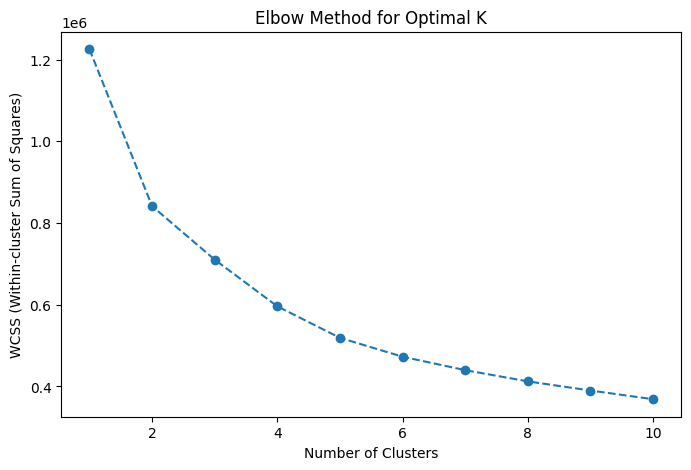

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method for optimal number of clusters
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

**Insights:** It is evident that the optimal number of clusters is 3.

## K-means clustering with n_clusters=3

In [107]:
# Training K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(df_scaled)

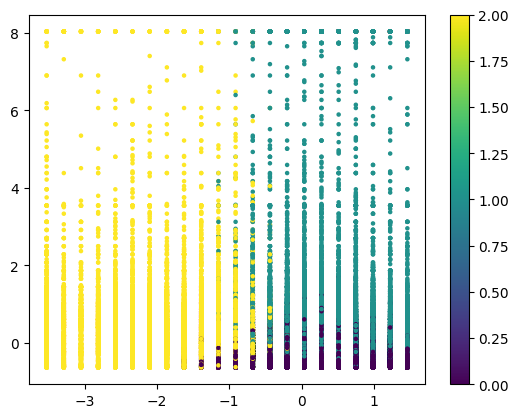

In [108]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled[:, :-1])
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

## Hierarchical clustering

Trying to get a high level idea about how many clusters we can from, by taking sample of 500 learners multiple times and forming hierarchy and visualising in dendrogram.

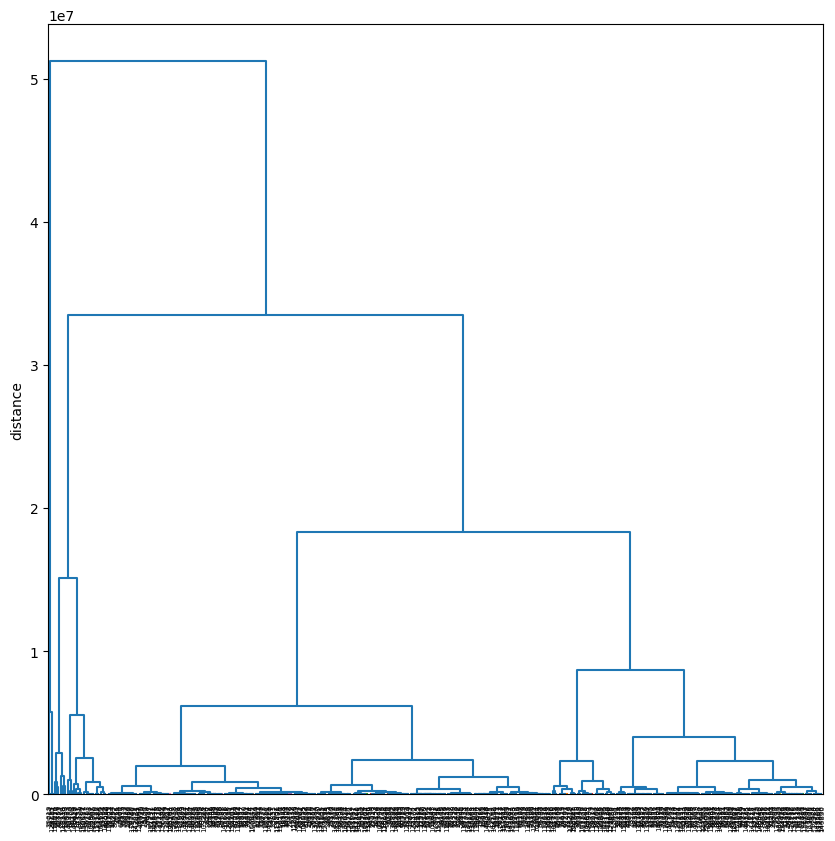

In [109]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = df.sample(500)
sample_scaled  = scaler.fit_transform(sample)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(10, 10))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

**Insights:** It is evident that the optimal number of clusters is 3.

In [110]:
clusters = pd.DataFrame(df, columns=df.columns)
clusters['label'] = kmeans.labels_

In [111]:
clusters.shape

(153187, 9)

In [112]:
clusters.head()

,orgyear,ctc,ctc_updated_year,years_of_experience,designation_flag,class_flag,tier_flag,ctc_log,label
0,2016.0,1100000.0,2020.0,8.0,2,1,2,20.069072,1
1,2018.0,449999.0,2019.0,6.0,3,3,3,18.779562,0
2,2015.0,2000000.0,2020.0,9.0,1,1,1,20.931569,1
3,2017.0,700000.0,2019.0,7.0,3,3,3,19.416995,0
4,2017.0,1400000.0,2019.0,7.0,2,1,1,20.416995,1


# **EDA after Clustering**

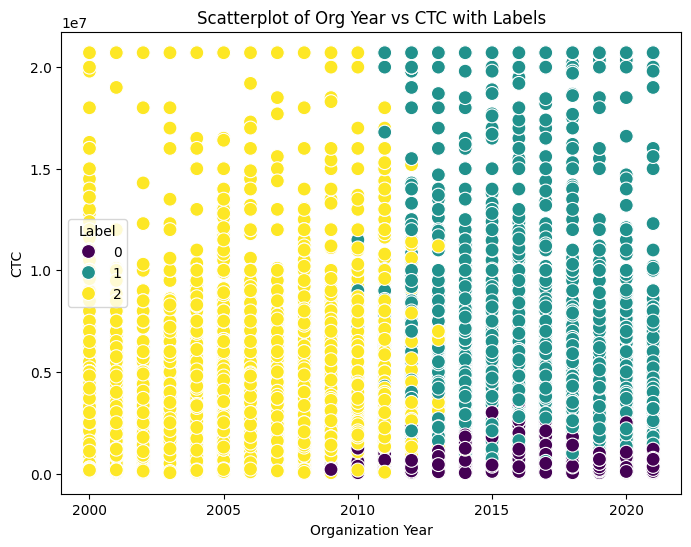

In [113]:
# Create the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clusters, x='orgyear', y='ctc', hue='label', palette='viridis', s=100)

plt.xlabel('Organization Year')
plt.ylabel('CTC')
plt.title('Scatterplot of Org Year vs CTC with Labels')
plt.legend(title='Label')
plt.show()

**Insights:**

*  Learners who joined post-2006-07 tend to receive CTCs up to 30 LPA.
*  There's a distinct group of highly experienced learners with substantial tenure.
*  Learners joining after 2012-13 have CTCs ranging from 20 LPA to 1.5 Cr.

<Axes: xlabel='label'>

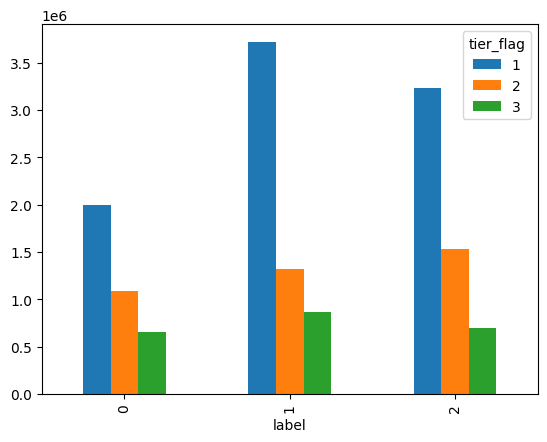

In [114]:
pd.crosstab(index = clusters['label'], columns = clusters['tier_flag'],
            values=clusters['ctc'],aggfunc= np.mean).plot(kind = 'bar')

<Axes: xlabel='label'>

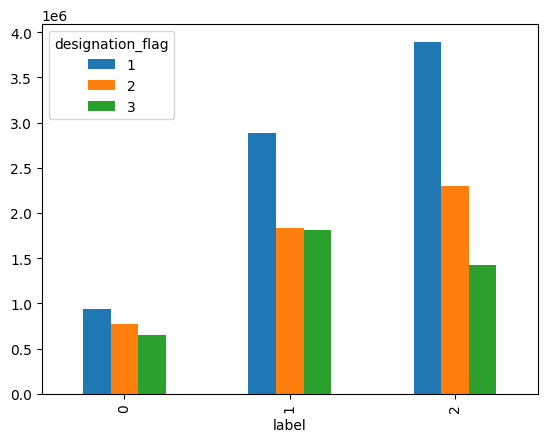

In [115]:
pd.crosstab(index = clusters['label'], columns = clusters['designation_flag'],
            values=clusters['ctc'],aggfunc= np.mean).plot(kind = 'bar')

<Axes: xlabel='label'>

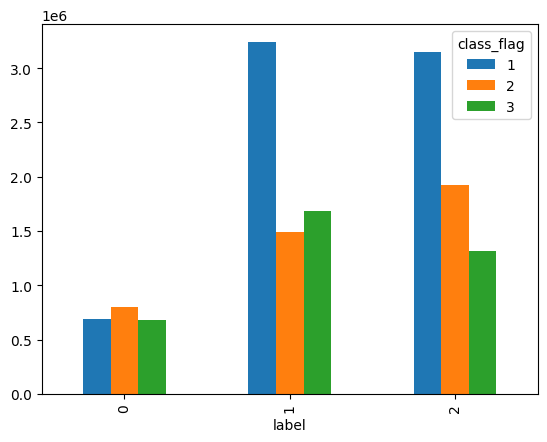

In [116]:
pd.crosstab(index = clusters['label'], columns = clusters['class_flag'],
            values=clusters['ctc'],aggfunc= np.mean).plot(kind = 'bar')

**Insights:** Based on k-Means Clustering algorithm output, as well as manual clustering, learners from tier1 company receiving very high CTC.

<Axes: xlabel='years_of_experience'>

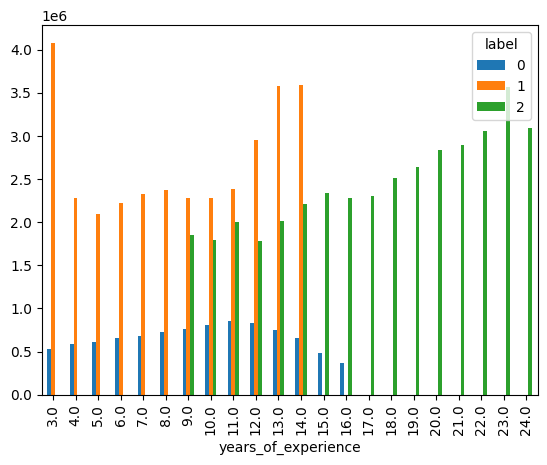

In [117]:
pd.crosstab(columns = clusters['label'], index = clusters['years_of_experience'],
            values=clusters['ctc'],aggfunc= np.mean).plot(kind = 'bar')

**Insights:**

*  Cluster 2 dominates learners with 8 to 24 years of experience, earning progressively higher CTCs.
*  Cluster 0 shows consistent representation for learners with 3 to 16 years of experience.
*  Cluster 1 has learners, mainly concentrated around 3 to 14 years of experience.

<Axes: xlabel='years_of_experience'>

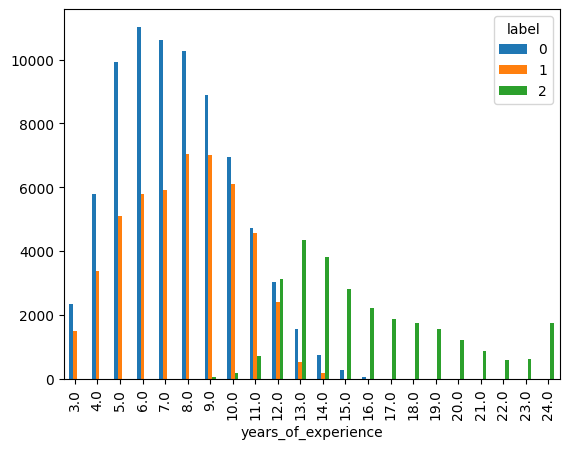

In [118]:
pd.crosstab(columns = clusters['label'],index = clusters['years_of_experience'],).plot(kind = 'bar')

In [119]:
clusters['label'].value_counts(normalize=True)*100

,proportion
label,
0,49.759444
1,32.331725
2,17.908830


**Insights:**

*  Nearly half (49.75%) of learners fall into the experience range of 1 to 15 years (Cluster 0).
*  A significant group (17.90%) consists of learners with 8 to 24 years of experience (Cluster 2).
*  Another 32.33% of learners belong to a separate group based on their experience (Cluster 2).

### `years_of_experience` per each cluster group of learners

<Axes: xlabel='label'>

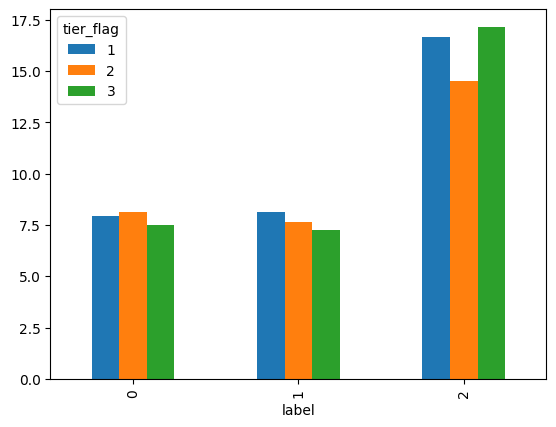

In [120]:
pd.crosstab(index = clusters['label'], columns = clusters['tier_flag'],
            values=clusters['years_of_experience'], aggfunc=np.mean
       ).plot(kind = 'bar')

### Statistical Summury based on Each Cluster

In [121]:
clusters.columns

Index(['orgyear', 'ctc', 'ctc_updated_year', 'years_of_experience',
       'designation_flag', 'class_flag', 'tier_flag', 'ctc_log', 'label'],
      dtype='object')

In [122]:
clusters.groupby('label').describe()[['ctc', 'years_of_experience', 'designation_flag', 'class_flag', 'tier_flag']].T

label                                 0             1             2
ctc                 count  7.622500e+04  4.952800e+04  2.743400e+04
                    mean   7.000650e+05  2.389969e+06  2.343370e+06
                    std    4.961298e+05  3.483035e+06  2.305823e+06
                    min    4.000000e+04  5.000000e+04  4.000000e+04
                    25%    4.000000e+05  1.000000e+06  1.200000e+06
                    50%    6.000000e+05  1.460000e+06  1.800000e+06
                    75%    8.900000e+05  2.300000e+06  2.850000e+06
                    max    7.000000e+06  2.070840e+07  2.070840e+07
years_of_experience count  7.622500e+04  4.952800e+04  2.743400e+04
                    mean   7.556445e+00  7.847076e+00  1.599672e+01
                    std    2.536280e+00  2.444315e+00  3.618745e+00
                    min    3.000000e+00  3.000000e+00  9.000000e+00
                    25%    6.000000e+00  6.000000e+00  1.300000e+01
                    50%    7.000000e+00  8.000000e+00  1.500000e+01
                    75%    9.000000e+00  1.000000e+01  1.800000e+01
                    max    1.600000e+01  1.400000e+01  2.400000e+01
designation_flag    count  7.622500e+04  4.952800e+04  2.743400e+04
                    mean   2.590712e+00  1.473712e+00  2.078917e+00
                    std    5.266938e-01  5.116167e-01  6.253536e-01
                    min    1.000000e+00  1.000000e+00  1.000000e+00
                    25%    2.000000e+00  1.000000e+00  2.000000e+00
                    50%    3.000000e+00  1.000000e+00  2.000000e+00
                    75%    3.000000e+00  2.000000e+00  2.000000e+00
                    max    3.000000e+00  3.000000e+00  3.000000e+00
class_flag          count  7.622500e+04  4.952800e+04  2.743400e+04
                    mean   2.812634e+00  1.502423e+00  1.741999e+00
                    std    3.906783e-01  5.269737e-01  7.315668e-01
                    min    1.000000e+00  1.000000e+00  1.000000e+00
                    25%    3.000000e+00  1.000000e+00  1.000000e+00
                    50%    3.000000e+00  1.000000e+00  2.000000e+00
                    75%    3.000000e+00  2.000000e+00  2.000000e+00
                    max    3.000000e+00  3.000000e+00  3.000000e+00
tier_flag           count  7.622500e+04  4.952800e+04  2.743400e+04
                    mean   2.885339e+00  1.598611e+00  1.584494e+00
                    std    3.227459e-01  5.926639e-01  7.002727e-01
                    min    1.000000e+00  1.000000e+00  1.000000e+00
                    25%    3.000000e+00  1.000000e+00  1.000000e+00
                    50%    3.000000e+00  2.000000e+00  1.000000e+00
                    75%    3.000000e+00  2.000000e+00  2.000000e+00
                    max    3.000000e+00  3.000000e+00  3.000000e+00

# **Insights and Recommendations**

## Insights

*  **High Salary Disparity:** Significant CTC variation indicates potential issues with data consistency and validation.
*  **Dominance of Backend Roles:** "Backend Engineer" is the most common role, comprising a large portion of the workforce.
*  **Concentration of Companies:** A single company employs 8337 individuals, indicating potential monopolistic practices.
*  **Salary Updates Trend:** 50% of salaries were updated post-2020, reflecting a responsive market.
*  **Anomalous CTC Values:** Maximum CTC of 1 billion suggests data entry errors or outlier cases.
*  **Employee Count Variation:** 37299 unique companies exhibit diverse employee counts, indicating market fragmentation.
*  **Median Salary Consistency:** Most employees earn around 950,000, showing a baseline compensation standard.
*  **Invalid Year Entries:** Invalid orgyear values indicate data entry issues requiring immediate attention.
*  **Class-based CTC Variation:** Class 1 employees earn significantly more than Class 3, showing skill premium.
*  **Tier-based CTC Variation:** Tier 1 companies offer higher compensation packages.
*  **Optimal Clustering:** Three clusters effectively categorize employee data based on CTC distributions.

## Recommendations

*  **Implement Strict Data Validation:** Establish robust data validation checks to minimize entry errors and enhance data integrity.
*  **Review Salary Discrepancies:** Investigate extreme CTC values and address any discrepancies through thorough data cleansing.
*  **Address Invalid Entries:** Audit and correct any invalid organizational year entries to improve overall data quality.
*  **Maintain Regular Salary Reviews:** Conduct frequent salary assessments to ensure compensation aligns with current market trends and employee expectations.
*  **Explore Technical Roles:** Freshers should consider positions like Backend Engineer, Fullstack Engineer, Frontend Engineer, QA Engineer, and Data Scientist for lucrative salaries as experience grows.
*  **Target Leading Companies:** Aspiring candidates seeking competitive CTC should target firms such as xzaxvmhrro and axoy ztnfgqp.
*  **Emphasize Skill Development:** Freshers should invest in skill-building to enhance their marketability in competitive roles.
*  **Network with Industry Professionals:** Engage with professionals from target companies for insights and potential job referrals.
*  **Leverage Internship Opportunities:** Recommend internships at reputable firms to help freshers secure better job offers and improve their salary negotiation power.